

# Project: No Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning"> Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be investigating the data set of No show appointments.<br> It is a data set of some patients' info, and whether or not they show up in their medical appointment. To investigate what parameters are usually related to patients who don't show up in their medical appointment.
>
> Question to answer: 
>
>- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>- What is the relation between each factor -represented by a column in the dataset- and showing up in the appointment?

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [52]:
# Load the dataset 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Dataset is loaded successfully with no problems.

In [53]:
# check the shape 
df.shape

(110527, 14)

> Dataset consists of 110527 row, and 14 columns.

In [54]:
# general info, columns datatypes, is there nulls.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [55]:
# check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

>- Dataset consists of 14 columns : 1 float , 8 int ,and 5 string. 
>- There is **no nulls** in any column.

In [56]:
# display general descriptive analysis 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>- Age column seems to have negaive value, which makes no sense and needs to be handeled.
>
>- Handicap column has a maximum value of 4, it supposed that this column's values are 0, 1.<br> the value 4 needs to be handeled.

In [57]:
# check for duplicates : repeated rows
sum(df.duplicated())

0

In [58]:
# check for repeated appointments for the same patient
sum(df['PatientId'].duplicated())

48228

<a id='cleaning'></a>
## Data Cleaning 

> ##### In the cleaning step, there are points to be handled:
>
> - Drop Columns not used for analysis : patientId, appointmentId and ScheduledDay won't be used in analysis so I'll drop them.     
> - Duplicates: There are **no duplicated rows** in the dataset.
> - Incorrect data types: ScheduledDay and AppointmentDay presented as object data types, they should be **DateTime** datatype.    
> - Missing data: There are **no missing values** in the dataset.
> - Structural problems, such as different column names: **no structural problems** in the dataset but I'll rename the columns to deal with it easire.
> - Mismatch number of records: In the aga columns, there are some non-logical-eg: negative values for age- values that need to be handled. Also in the Handcap column, There is a maximum value of 4 which needs to be handled.

1- Drop columns not used in analysis

In [59]:
df.drop('PatientId', inplace=True, axis=1)
df.drop('AppointmentID', inplace=True, axis=1)
df.drop('ScheduledDay', inplace=True, axis=1)


In [60]:
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [61]:
df.shape

(110527, 11)

2-Age 
> Age column has incorrect values, which are negative value = -1 and value = 0. Which doesn't make sense to be values of the age. <br> In the following cells I'll be handling them.

In [62]:
# Multiply negative age with -1 to make it positive
df['Age']= df['Age'].apply(lambda x: x*-1 if x<0 else x)

In [63]:
# check if it was done correctly  
df['Age'].describe()

count    110527.000000
mean         37.088892
std          23.110176
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [64]:
# drop rows with age = 0
df.drop(df.index[df['Age'] == 0], inplace=True)
# check if it was done
df['Age'].describe()

count    106988.000000
mean         38.315736
std          22.466399
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

In [65]:
# check the new shape
df.shape

(106988, 11)

3- Appoappointment day Datatype
> Appointment day data type is object, However, it's more convenient to be Datetime as it is easier in further operations.

In [66]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [67]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106988 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          106988 non-null  object             
 1   AppointmentDay  106988 non-null  datetime64[ns, UTC]
 2   Age             106988 non-null  int64              
 3   Neighbourhood   106988 non-null  object             
 4   Scholarship     106988 non-null  int64              
 5   Hipertension    106988 non-null  int64              
 6   Diabetes        106988 non-null  int64              
 7   Alcoholism      106988 non-null  int64              
 8   Handcap         106988 non-null  int64              
 9   SMS_received    106988 non-null  int64              
 10  No-show         106988 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(3)
memory usage: 9.8+ MB


In [68]:
# Convert the appointment day to the corresponding day of the week to use in analysis
df['AppointmentDay'] = df['AppointmentDay'].dt.day_name()


4- Rename Columns to lower case
> Here I'll be changing all the columns to their lower case names for easier work.

In [69]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head()

,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,No


5- Handcap column 
> The handcap column contains an incorrect value of 4, However, the value range is supposed to be [0:1], So this will be handled in the following cells. 

In [70]:
# drop rows with habdcap > 1
df.drop(df.index[df['handcap'] > 1 ], inplace=True)
# check if it was done
df['handcap'].describe()

count    106789.000000
mean          0.019112
std           0.136921
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: handcap, dtype: float64

In [71]:
df.shape

(106789, 11)

> Now we have 106789 rows and 11 columns ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### 1-What is the distribution of the columns in the dataset ? 
#### 1.1 Investigating the histogram 

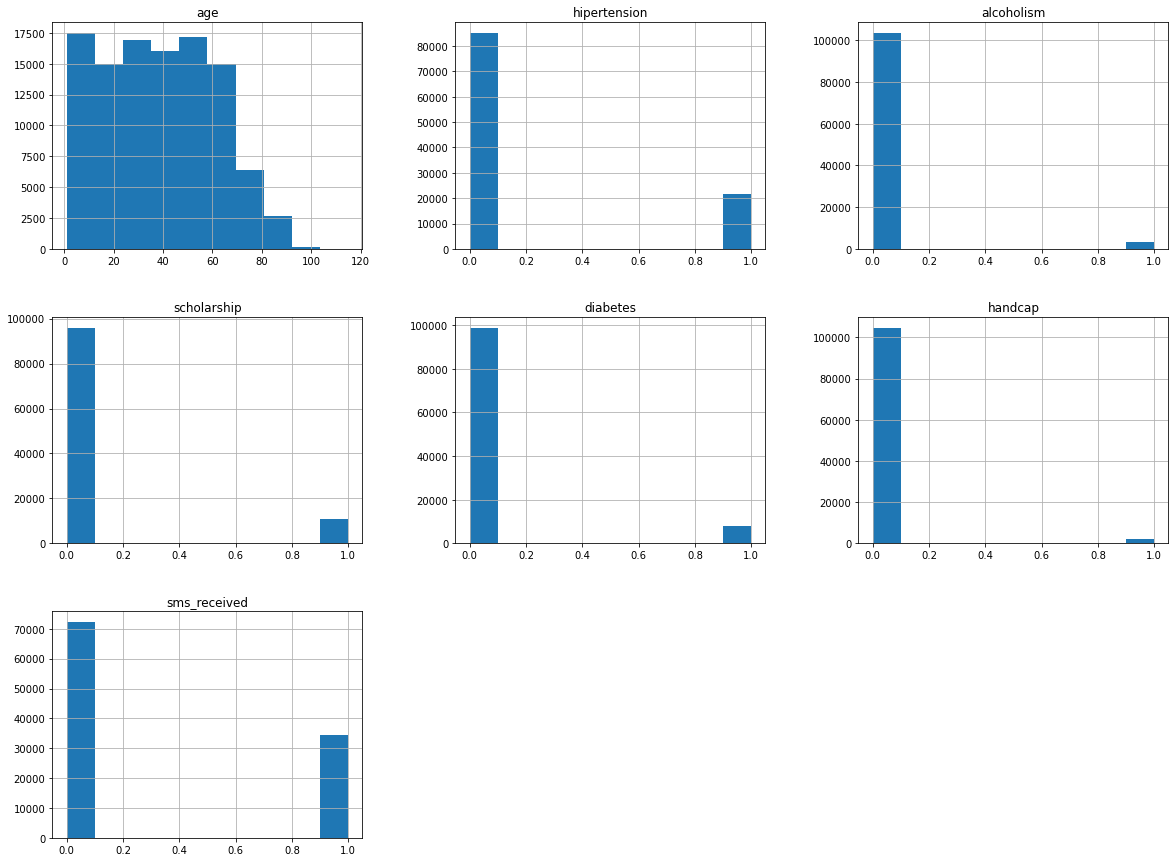

In [72]:
columns =['age', 'hipertension','alcoholism','scholarship','diabetes','handcap','sms_received'] 
df[columns].hist(figsize=(20, 15));

> Takeaways:
>- Most of the data saet age categories are from 20 to 75.
>- Most of the data has no diabetes, no hand cap and no hipertension.
>- The poeple who recieved a sms with the appointment to who didn't recieved are 1:2.
>- Only Few people who had a scholarship.
>- Only Few people are alcoholic.


#### 1.1 Investigating the box plot

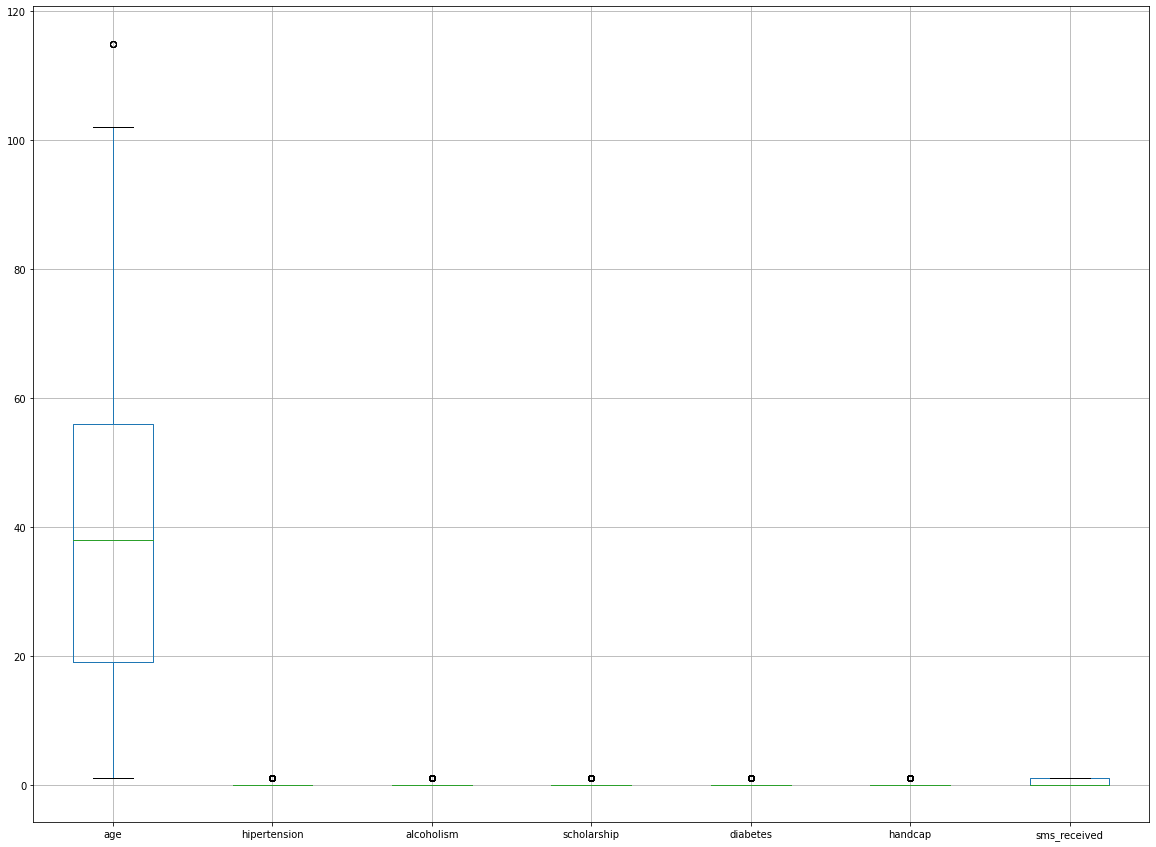

In [73]:
columns =['age', 'hipertension','alcoholism','scholarship','diabetes','handcap','sms_received'] 
df[columns].boxplot(figsize=(20, 15));


> The boxplot shows that the age's column has an outlier, which is probably the value 115, I considered normal value.

### 2-What is the percentage of the who didn't show up in their appointments to the people who did show up?

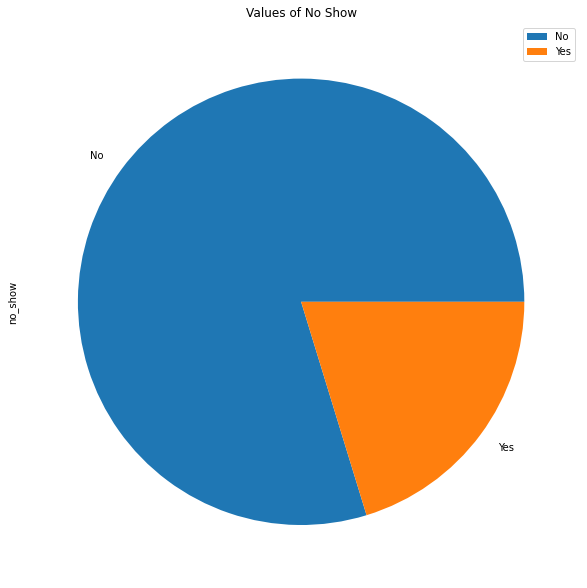

In [74]:
var = df['no_show'].value_counts();
plot =var.plot.pie(figsize=(10, 15));
plt.title('Values of No Show');
plt.legend();


> This pie chart shows that the percentage of people who show up in their appointments to those who didn't is approximately 4:1. 

In [75]:
# Specify that the patient show up in their appointment with name show to deal easier 
show = df.no_show =='No'
df[show].count()

gender            85150
appointmentday    85150
age               85150
neighbourhood     85150
scholarship       85150
hipertension      85150
diabetes          85150
alcoholism        85150
handcap           85150
sms_received      85150
no_show           85150
dtype: int64

In [76]:
# Specify that the patient didn't show up in their appointment with name didnot_show to deal easier 
didnot_show = df.no_show =='Yes'
df[didnot_show].count()

gender            21639
appointmentday    21639
age               21639
neighbourhood     21639
scholarship       21639
hipertension      21639
diabetes          21639
alcoholism        21639
handcap           21639
sms_received      21639
no_show           21639
dtype: int64

### 3- Does the gender affect showing up or not in a medical appointment?

In [77]:
# Unique values in the column gender 
df['gender'].unique()

array(['F', 'M'], dtype=object)

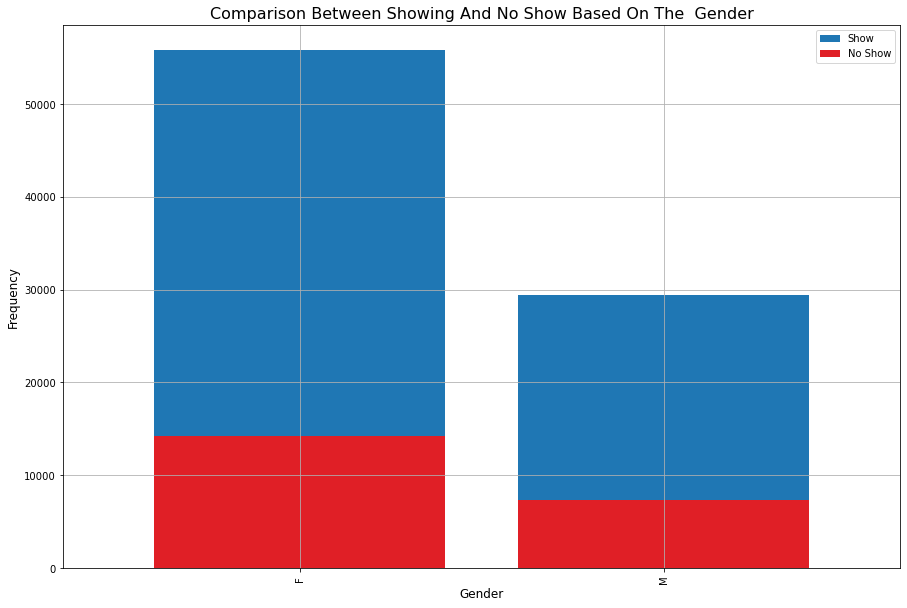

In [78]:
# show bar plot for the relationship between gender and no show. 
df.gender[show].value_counts().plot.bar( width=0.8, figsize=(15,10), label='Show' ) # Blue for show
df.gender[didnot_show].value_counts().plot.bar( width=0.8, figsize=(15,10),facecolor="#E01F26", label='No Show') # Red for no show
# Add title and format it 
plt.title("comparison between showing and no show based on the  gender".title(), fontsize = 16)
#  x label 
plt.xlabel('gender'.title(),fontsize = 12);
#  y label 
plt.ylabel("Frequency".title(),fontsize = 12);
plt.grid()
plt.legend()
plt.show();

> Females are double males already so it's not a fair measure.
> Gender not necessarily affect attending the medical appointment.

>The proportion of males who didn't show up in their appointments to the total proportion of males is similar to the proportion of females who didn't show up in their appointments to the total proportion of females, **there is no clear relationship between the gender and showing up or not in the appointment.**

### 4- Does the age affect showing up or not in a medical appointment?

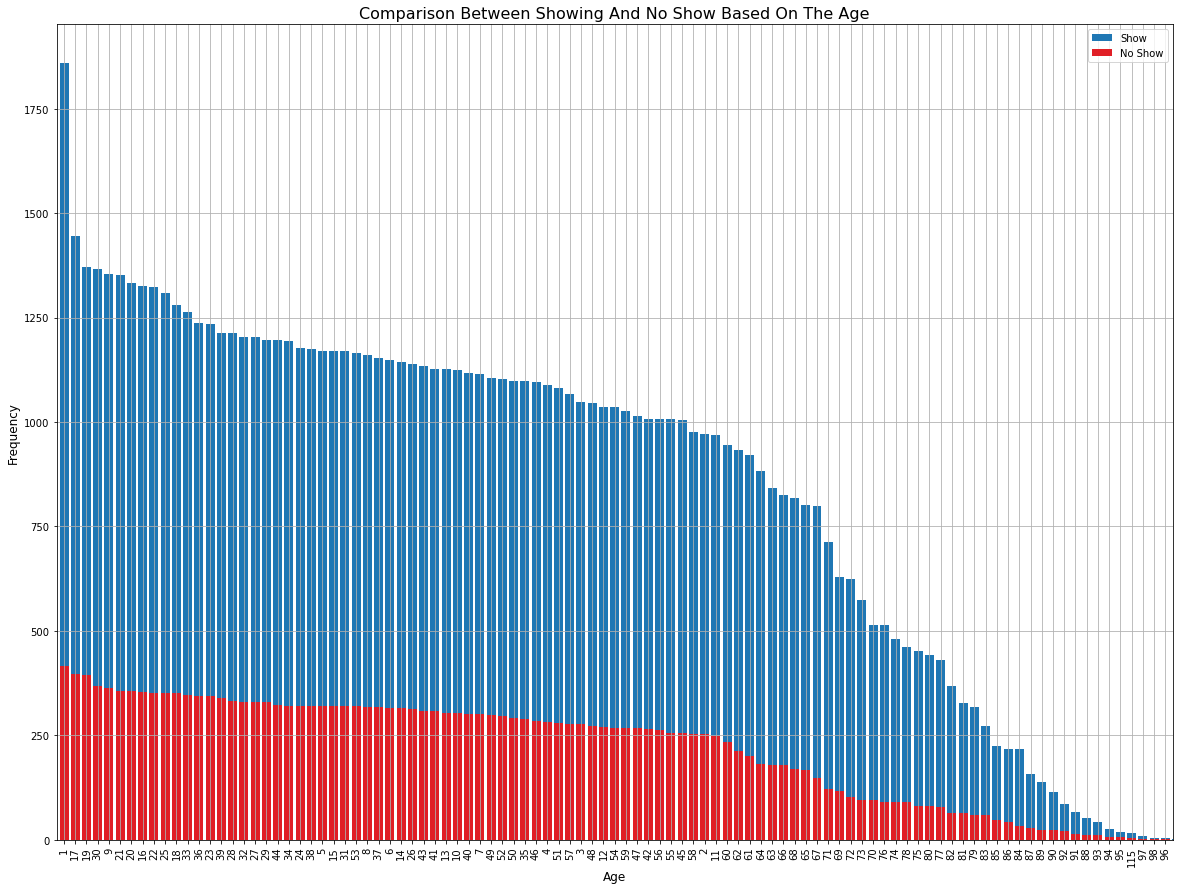

In [79]:
# show bar plot for the relation ship between age and no show. 
df.age[show].value_counts().plot(kind='bar', width=0.8, figsize=(20,15), label= 'Show')
df.age[didnot_show].value_counts().plot(kind='bar', width=0.8, figsize=(20,15), color = "#E01F26",label= 'No Show')
# Add title and format it 
plt.title("comparison between showing and no show based on the age".title(), fontsize = 16)
#  x label 
plt.xlabel('Age'.title(),fontsize = 12);
#  y label 
plt.ylabel("Frequency".title(),fontsize = 12);
plt.legend()
plt.grid()
plt.show();

>From this graph, babies are more likely to attend their appointments,  people starting from age 57 are likelier not to attend their appointments, But still, there's no clear relationship between age and showing up or not.

### 5- Does receiving SMS before the appointment affect showing up or not in a medical appointment?

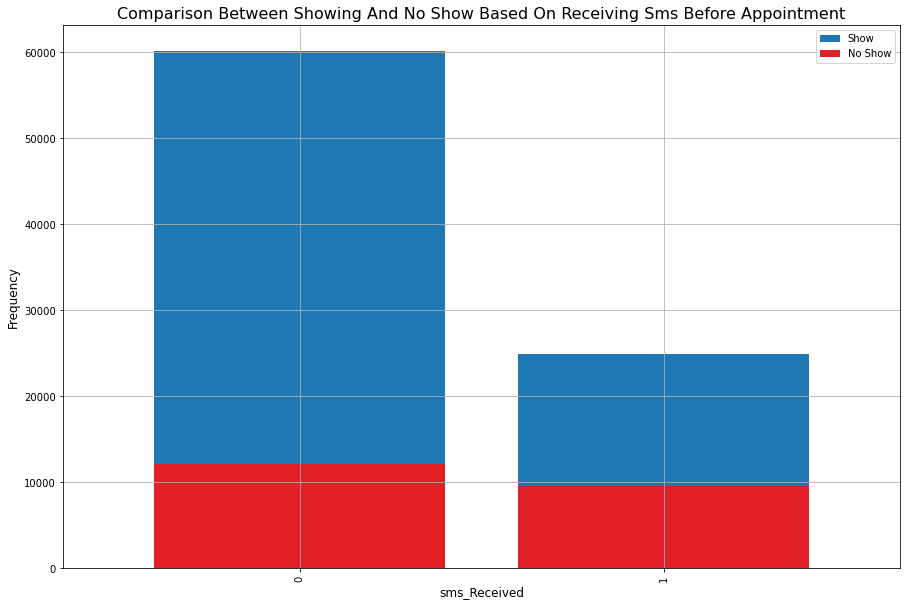

In [80]:
# show bar plot for the relation ship between receiving sms before appointment and no show. 
df.sms_received[show].value_counts().plot(kind='bar', width=0.8, figsize=(15,10), label='Show')
df.sms_received[didnot_show].value_counts().plot(kind='bar', width=0.8, figsize=(15,10), color = "#E01F26", label='No Show')
# Add title and format it 
plt.title("comparison between showing and no show based on receiving sms before appointment".title(), fontsize = 16)
#  x label 
plt.xlabel('sms_Received',fontsize = 12);
#  y label 
plt.ylabel("Frequency".title(),fontsize = 12);
plt.legend()
plt.grid()
plt.show();

> The portion of patients who received SMS and didn't show up is much higher than those who didn't receive SMS and didn't show up, and this a bit doesn't make sense.

### 6- Does the appointment's day affect showing up or not in a medical appointment?

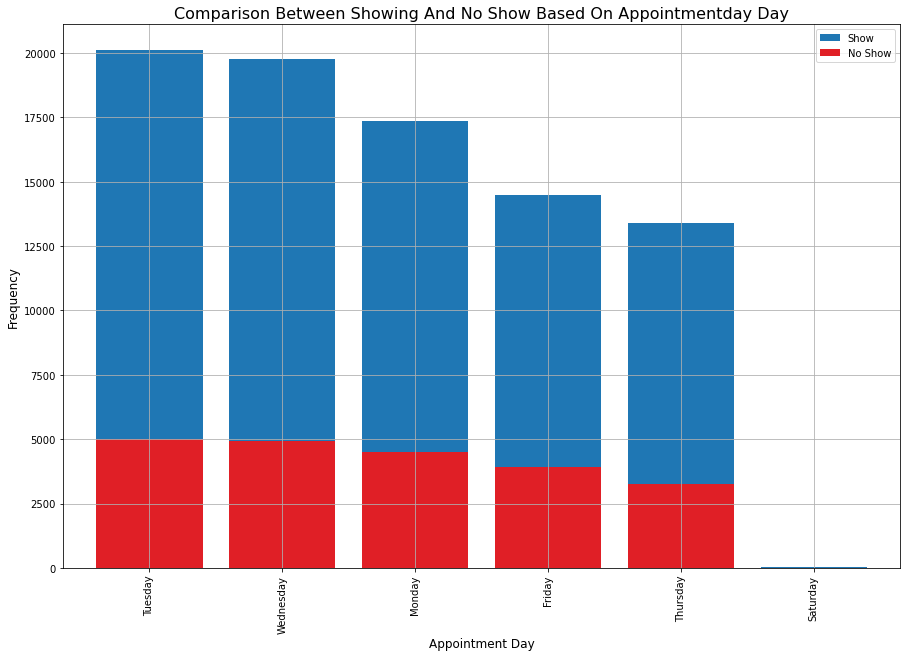

In [81]:
# show bar plot for the relationship between scheduled day and no show. 
df.appointmentday[show].value_counts().plot(kind='bar', width=0.8, figsize=(15,10), label='Show')
df.appointmentday[didnot_show].value_counts().plot(kind='bar', width=0.8, figsize=(15,10), color = "#E01F26",label='No Show')
# Add title and format it 
plt.title("comparison between showing and no show based on appointmentday day".title(), fontsize = 16)
#  x label 
plt.xlabel('appointment day'.title(),fontsize = 12);
#  y label 
plt.ylabel("Frequency".title(),fontsize = 12);
plt.legend()
plt.grid()
plt.show();

> There is no clear relationship between the appointment day and show/no show, however very very few people go for appointments on Saturday, and all of them attend their appointments.

### 7- Does the neighbourhood affect showing up or not in a medical appointment?

In [82]:
len(df['neighbourhood'].unique())

81

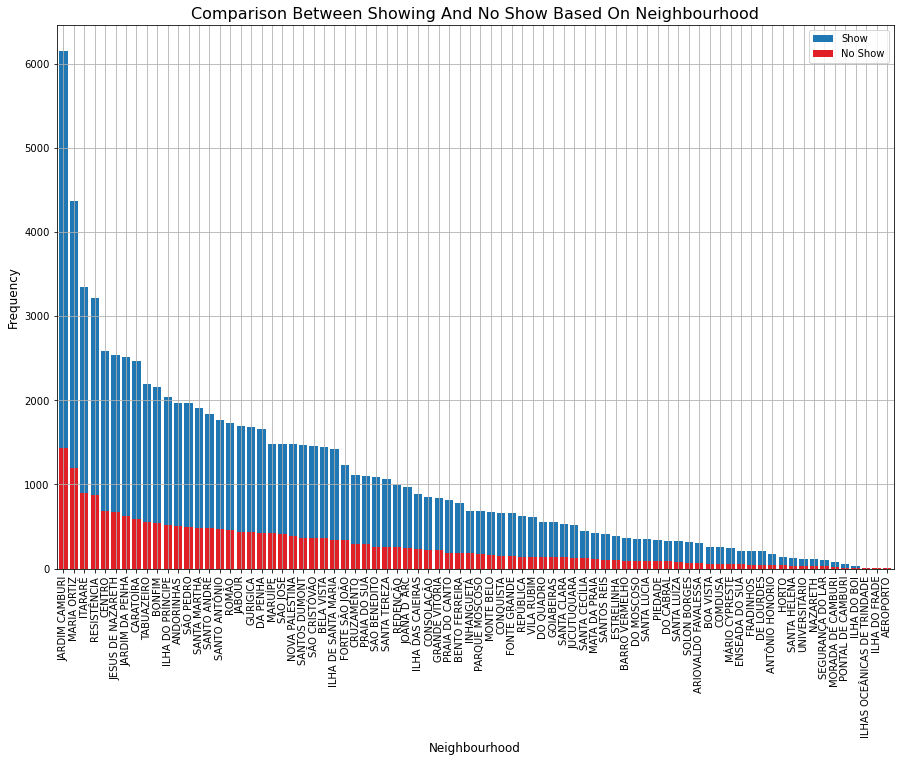

In [83]:
# show bar plot for the relationship between neighbourhood and no show. 
df.neighbourhood[show].value_counts().plot(kind='bar', width=0.8, figsize=(25,20), label='Show')
df.neighbourhood[didnot_show].value_counts().plot(kind='bar', width=0.8, figsize=(15,10), color = "#E01F26", label='No Show')
# Add title and format it 
plt.title("comparison between showing and no show based on neighbourhood".title(), fontsize = 16)
#  x label 
plt.xlabel('neighbourhood'.title(),fontsize = 12);
#  y label 
plt.ylabel("Frequency".title(),fontsize = 12);
plt.legend()
plt.grid()
plt.show();

>There is a clear relationship between the neighborhood and showing up on the appointment or not.
>
> Neighborhoods with the highest showing up rates are:
>
>- Jardim Camburi
>- Maria Ortiz
>- Itarare
>
> Neighborhoods with the lowest showing up rates are :
>
>- Ilhas oceânicas de trindade
>- Ilha de frade 
>- Aevoporto


### 8- Does receiving a scholarship affect showing up or not in a medical appointment?

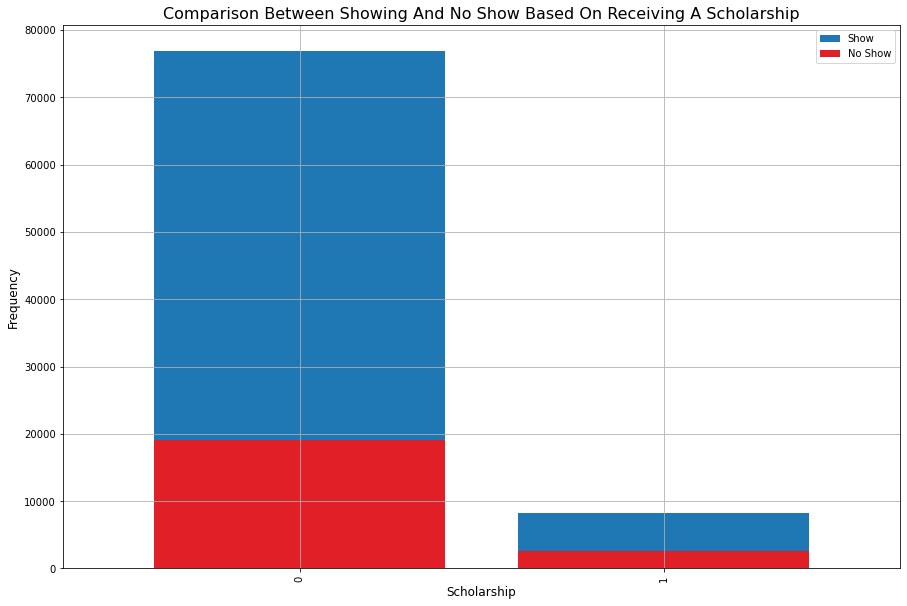

In [84]:
# show bar plot for the relationship between scholarship and no show. 
df.scholarship[show].value_counts().plot(kind='bar', width=0.8, figsize=(25,20), label='Show')
df.scholarship[didnot_show].value_counts().plot(kind='bar', width=0.8, figsize=(15,10), color = "#E01F26", label='No Show')
# Add title and format it 
plt.title("comparison between showing and no show based on receiving a scholarship".title(), fontsize = 16)
#  x label 
plt.xlabel('scholarship'.title(),fontsize = 12);
#  y label 
plt.ylabel("Frequency".title(),fontsize = 12);
plt.legend()
plt.grid()
plt.show();

>- There is no clear relationship between receiving a scholarship and showing up for the appointment or not.
>
>- The proportions of patients who receive scholarships and do not show up in their appointment are similar to the proportions of patients who don't receive scholarships and do not show up in their appointment.

### 9- Does hypertension affect showing up or not in a medical appointment?


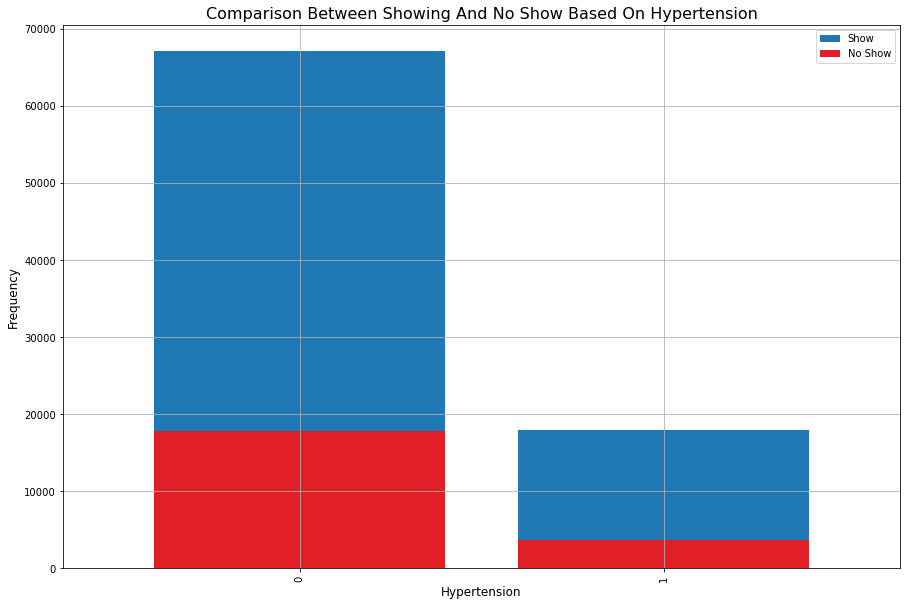

In [85]:
# show bar plot for the relationship between hypertension and no show. 
df.hipertension[show].value_counts().plot(kind='bar', width=0.8, figsize=(25,20), label='Show')
df.hipertension[didnot_show].value_counts().plot(kind='bar', width=0.8, figsize=(15,10), color = "#E01F26", label='No Show')
# Add title and format it 
plt.title("comparison between showing and no show based on hypertension".title(), fontsize = 16)
#  x label 
plt.xlabel('hypertension'.title(),fontsize = 12);
#  y label 
plt.ylabel("Frequency".title(),fontsize = 12);
plt.legend()
plt.grid()
plt.show();

>- There is no clear relationship between hypertension and showing up for the appointment or not.
>
>- The proportions of patients who have hypertension and do not show up in their appointment are similar to the proportions of patients who don't have hypertension and do not show up in their appointment.

### 10- Does having diabetes showing up or not in a medical appointment?

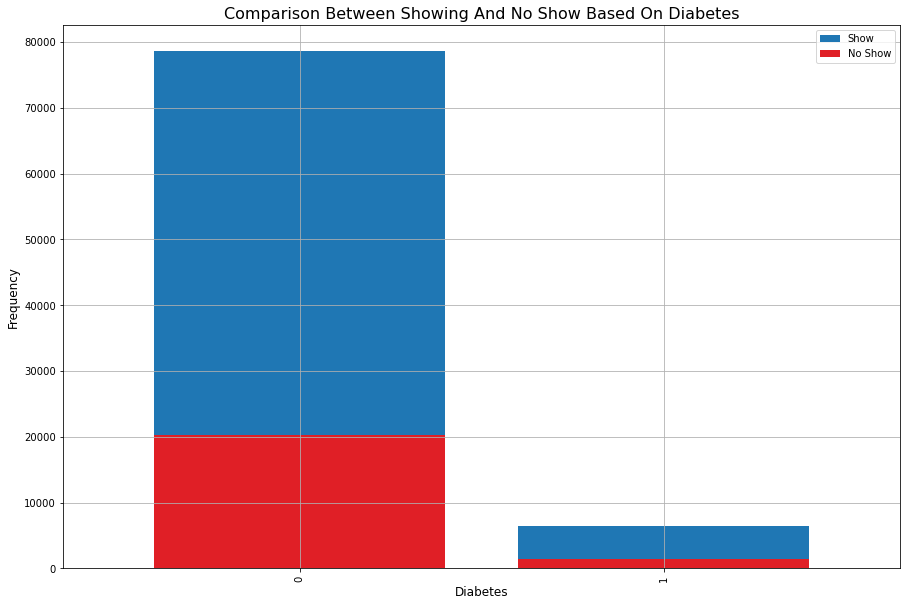

In [86]:
# show bar plot for the relationship between diabetes and no show. 
df.diabetes[show].value_counts().plot(kind='bar', width=0.8, figsize=(25,20),label='Show')
df.diabetes[didnot_show].value_counts().plot(kind='bar', width=0.8, figsize=(15,10), color = "#E01F26", label='No Show')
# Add title and format it 
plt.title("comparison between showing and no show based on diabetes".title(), fontsize = 16)
#  x label 
plt.xlabel('diabetes'.title(),fontsize = 12);
#  y label 
plt.ylabel("Frequency".title(),fontsize = 12);
plt.legend()
plt.grid()
plt.show();

>- There is no clear relationship between diabetes and showing up for the appointment or not.
>
>- The proportions of patients who have diabetes and do not show up in their appointment are similar to the proportions of patients who don't have diabetes and do not show up in their appointment.

### 11- Does the hand cap affect showing up or not in a medical appointment?

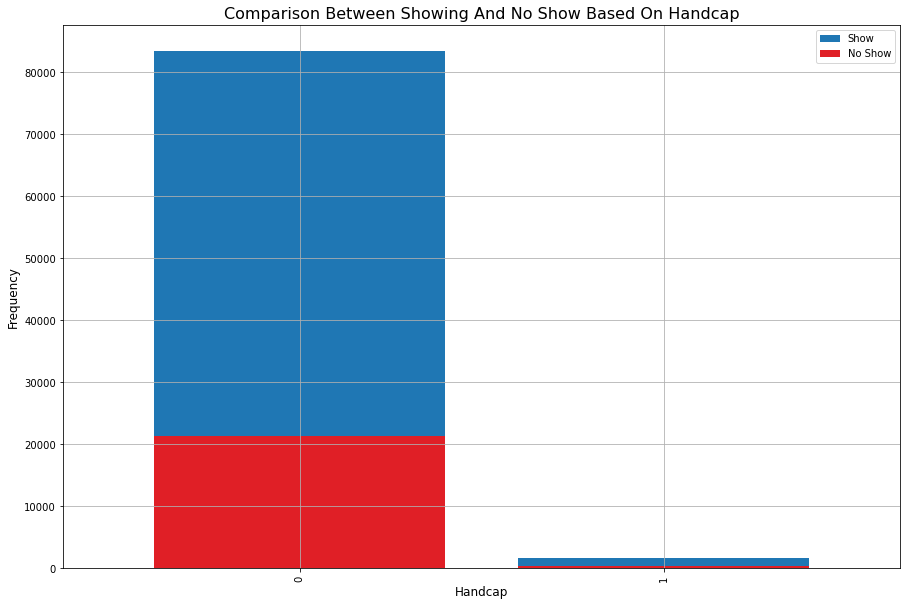

In [87]:
# show bar plot for the relationship between handcap and no show. 
df.handcap[show].value_counts().plot(kind='bar', width=0.8, figsize=(25,20), label='Show')
df.handcap[didnot_show].value_counts().plot(kind='bar', width=0.8, figsize=(15,10), color = "#E01F26", label='No Show')
# Add title and format it 
plt.title("comparison between showing and no show based on handcap".title(), fontsize = 16)
#  x label 
plt.xlabel('handcap'.title(),fontsize = 12);
#  y label 
plt.ylabel("Frequency".title(),fontsize = 12);
plt.legend()
plt.grid()
plt.show();




>- There is no clear relationship between handcap and showing up for the appointment or not.
>
>- The proportions of patients who have handcap and do not show up in their appointment are similar to the proportions of patients who don't have handcap and do not show up in their appointment.

### 12- Does alcoholism affect showing up or not in a medical appointment?

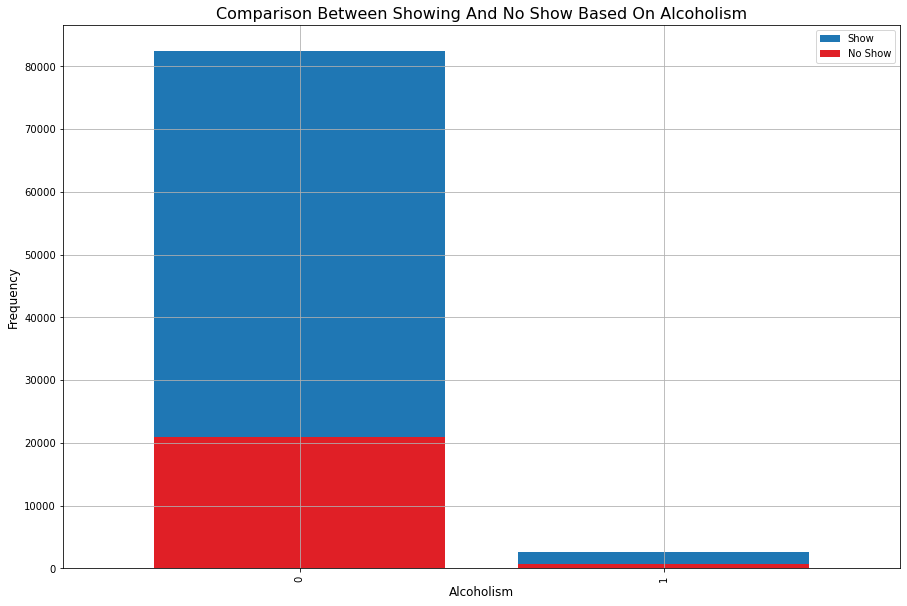

In [88]:
# show bar plot for the relationship between alcoholism and no show. 
df.alcoholism[show].value_counts().plot(kind='bar', width=0.8, figsize=(25,20), label='Show')
df.alcoholism[didnot_show].value_counts().plot(kind='bar', width=0.8, figsize=(15,10), color = "#E01F26",label='No Show')
# Add title and format it 
plt.title("comparison between showing and no show based on alcoholism".title(), fontsize = 16)
#  x label 
plt.xlabel('alcoholism'.title(),fontsize = 12);
#  y label 
plt.ylabel("Frequency".title(),fontsize = 12);
plt.legend ()
plt.grid()
plt.show();

>- There is no clear relationship between alcoholism and showing up for the appointment or not.
>
>- The proportions of patients who have alcoholism and do not show up in their appointment are similar to the proportions of patients who don't have alcoholism and do not show up in their appointment.

<a id='conclusions'></a>
## Conclusions
### **Findings Summary**

#### **1- Gender:**
##### - In the dataset, The females proportion is greater than the males proportion. However, gender doesn't seem to have a significant effect on showing up or not.  
#### **2- The Appointment Day:**
##### - The scheduled day doesn't seem to have a significant effect on showing up or not, As the proportion of showing and not showing is approximately similar on all weekdays.<br> However, for Saturday, a very few people scheduled an appointment on this day, and there was no show.
#### **3- Age:**
##### - There is no clear relationship between age and show/no show.<br> However, Babies and children are more likely to show up at their appointments. With getting older, starting from age 57, People are more likely to not show up at their appointments.
#### **4- Neighborhood:**
##### - Neighborhoods have a direct relationship between showing up for an appointment or not. <br> Neighborhoods with the highest showing up rates are:
>
>- Jardim Camburi
>- Maria Ortiz
>- Itarare
>
##### Neighborhoods with the lowest showing up rates are :
>
>- Ilhas oceânicas de trindade
>- Ilha de frade 
>- Aevoporto

#### **4- Receiving SMS:**
##### - It appeared that the proportion of people who didn't show up in their appointments after receiving an SMS is **higher than** the proportion of people who didn't show up in their appointments without receiving an SMS.

#### **5- Scholarship, Hypertension, Diabetes, and Handcape:**
##### - For scholarship, hypertension, diabetes, and handicap there was no clear effect between each of them and show or no show.<br>There was no significant difference between having scholarship or hypertension or diabetes, or handicap and show and not having scholarship or hypertension or diabetes, or handicap and no show.
 

#### **Exploration's Limitations**
##### There were some limitations while working on this project, Which includes:
**1.  Limited sample size of No-Show patients**.<br> More data, better insights. But in this data set, the show to no show percentage was 4:1, which I believe can affect the analysis' quality.
**2. No clear correlation between independent variables and the dependent variable**.<br> For 4 of the independent variables, the analysis showed no clear relationship between the independent variable and the dependent variable, which makes it harder to define a clear relationship about what affects the dependent variable.